# Introducción al machine learning

**API 2**

**Alumno**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repositorio**: [GitHub](https://github.com/hhvergara/teclab_intro_ml)

### Situación
El RMS Titanic fue, en su momento, el mayor barco de pasajeros del mundo.
Se  hundió  en  su  viaje  inaugural  de  Southampton  a  Nueva  York,  en  el  año
1912. En el evento, fallecieron 1514 de las 2223 personas que iban a bordo,
entre tripulación y pasajeros.
Hoy, en el año 2022, se ha decidido hacer un estudio de machine learning en
el cual se requiere de nuestras labores como técnicos en Data Science, para
identificar  diversos  patrones  que  permitan  verificar  si,  basándonos  en  el
entrenamiento de nuestro modelo de datos, la máquina es capaz de predecir
si una persona logra sobrevivir o no.
Para  ello  se  utilizarán  varias  bases  para  llevar  a  cabo  nuestro  análisis:  las
primeras denominadas “train.csv” y “test.csv”, que pertenecen a un set de
datos de entrenamiento; y otra para testear nuestra información.

### Consignas

El  desafío  actual  consiste  en  generar  un  modelo  de  regresión  logística  que
permita calcular el grado de accuracy con el cual se pueda determinar, en el
grupo de "prueba", quiénes son los sobrevivientes en la tragedia del Titanic.

a) Describir  brevemente la  cantidad  de  valores  faltantes  para  cada  una
de las variables de la base de datos.

b) Completar  aquellas  variables  que  se  encuentran  faltantes  para  las
bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

c) Ajustar el primer modelo de regresión logística.

d) Entrenar y determinar el nivel de accuracy del primer modelo.

#### 💡 Importamos las librerias y cargamos el dataset que vamos a utilizar:

In [13]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data', 'API2')
filename_train_data = os.path.join(__data_dir__, 'train.csv')
filename_test_data = os.path.join(__data_dir__, 'test.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [14]:
train_data = pd.read_csv(filename_train_data).sort_values('PassengerId')
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### a) Visualizamos los valores nulos en el dataset:

In [15]:
# Porcentaje de datos nulos por columna:
100 * (train_data.isnull().sum() / train_data.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### B) Reemplazo de valores
Luego de analizar el porcentaje de valores nulos en el dataset, vemos que Cabin tiene un 77.10% de datos faltantes, por lo tanto es dificil obtener una tendencia con estos datos.
Vamos a imputar las columnas Age y Embarked para cubrir estos faltantes

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Label Encoder
Teniendo en cuenta que los modelos trabajan con tipos de datos numericos (int y float) tenemos que llevar los tipos "object" a un formato numerico usando algun metodo de encoder. Para este caso, utilizamos Label Encoder, que es lo visto en clase.

In [17]:
pre_columns = ['Sex', 'Embarked']
for column in pre_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column].astype(str))

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [18]:
# Imputamos las columnas con nulos para reemplazarlos con los vecinos cercanos
imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_data[['Age', 'Embarked']] = imputer.fit_transform(train_data[['Age', 'Embarked']])


display(train_data.info())
100 * (train_data.isnull().sum() / train_data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


None

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

#### C) Comenzamos a preparar el modelo de regrecion logistica:

In [19]:
# Seleccionamos las columnas que vamos a usar para el entrenamiento
x, y = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
# Dividimos el conjunto de datos en entrenamiento y validación
seed_number = 28
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=seed_number)

#### D) Entrenamos nuestro modelo:

In [21]:
# Creamos el modelo de regresión logística
reg = LogisticRegression(random_state=seed_number)
reg.fit(x_train, y_train)

/Users/hvergara/Documents/test/Teclab/teclab_intro_ml/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=28)

#### Realizamos una prediccion y visualizamos el accuracy del modelo:

In [22]:
# Predicciones
y_pred = reg.predict(x_val)
reg_acc = accuracy_score(y_val, y_pred)
reg_prec = precision_score(y_val, y_pred)
reg_rec = recall_score(y_val, y_pred)
reg_f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {reg_acc}')
print(f'Precision: {reg_prec}')
print(f'Recall: {reg_rec}')
print(f'F1: {reg_f1}')

Accuracy: 0.7694915254237288
Precision: 0.7425742574257426
Recall: 0.6410256410256411
F1: 0.6880733944954128


#### Ahora probamos un arbol de decision para comparar el accuracy:

In [23]:
tree = DecisionTreeClassifier(random_state=seed_number)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

In [24]:
# Predicciones
y_pred = tree.predict(x_val)
tree_acc = accuracy_score(y_val, y_pred)
tree_prec = precision_score(y_val, y_pred)
tree_rec = recall_score(y_val, y_pred)
tree_f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {tree_acc}')
print(f'Precision: {tree_prec}')
print(f'Recall: {tree_rec}')
print(f'F1: {tree_f1}')

Accuracy: 0.7288135593220338
Precision: 0.6637168141592921
Recall: 0.6410256410256411
F1: 0.6521739130434783


### Generamos un grafico para comparar ambos modelos:

AttributeError: 'NoneType' object has no attribute 'set_title'

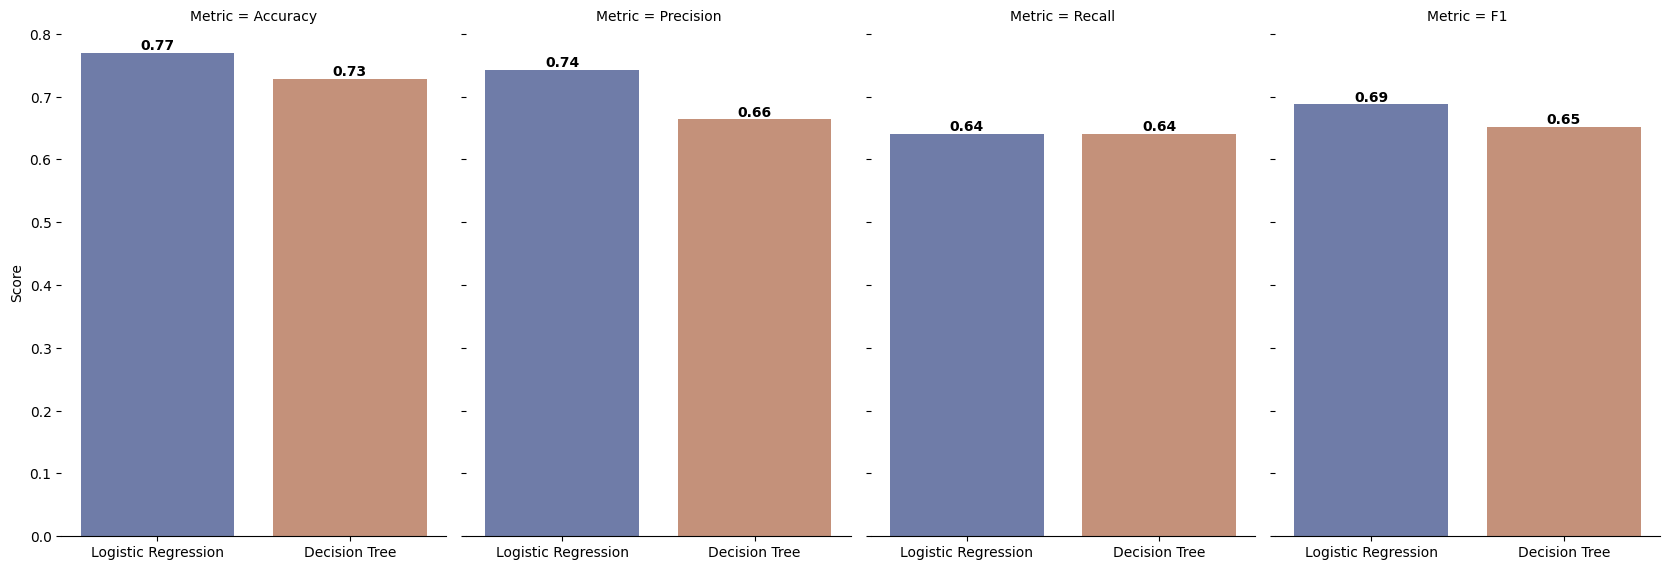

In [25]:
df_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [reg_acc, tree_acc],
    'Precision': [reg_prec, tree_prec],
    'Recall': [reg_rec, tree_rec],
    'F1': [reg_f1, tree_f1]
})

# Transforma el dataframe a un formato largo adecuado para FacetGrid
df_melted = df_accuracy.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Crea el gráfico con FacetGrid
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Model", col="Metric",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=0.7
)

# Añade etiquetas numéricas a cada barra
for ax in g.axes.flat:
    for bar in ax.patches:
        # Obtiene la posición de cada barra y su altura para etiquetar
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Ajusta los detalles del gráfico
g.despine(left=True)
g.set_axis_labels("", "Score")
g.fig.suptitle("Model Performance Metrics", y=1.05)